In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import norm

In [5]:
def plot_swtest(x, data, x_delay=False, log_y=True, alpha=0.05):
    """
    H0: dist1 = dist2
    d < critical value, p-value > alpha -->> accept H0
    ------
    x: 1d array (time, delay mode)
    data: 2d array (visibility, power)
    x_delay: is x axis delay? (default: False)
    log_y: Use log scale for p-values? (default: True)
    alpha: significance level (default: 0.05)
    ------
    Data matrix rows -->> time sample
    Data matrix columns -->> frequency/delay mode
    """
    
    if x_delay:
        data = np.transpose(data)
        
    # perform KS test between each empirical dataset with its corresponding normal distribution
    # get p-values
    p = []
    for i in range(len(data)):
        p.append(stats.shapiro(data[i])[1])
    
    # plot sw-test results
    plt.figure(figsize=(12,4))
    plt.plot(x, [alpha for i in range(len(x))], 'k--', label='Significance level')
    plt.plot(x, p, 'g-', label="p values")
    plt.legend()
    if log_y:
        plt.ylabel("log(p)", fontsize=14)
    if log_y != True:
        plt.ylabel("p", fontsize=14)
    if x_delay:
        plt.xlabel("Delay (ns)", fontsize=14)
        plt.title("Shapiro-Wilk Test by Delay Mode")
    else: 
        plt.xlabel("Time sample", fontsize=14)
        plt.title("Shapiro-Wilk Test by Time Sample")
    if log_y:
        plt.yscale('log')
    plt.grid()

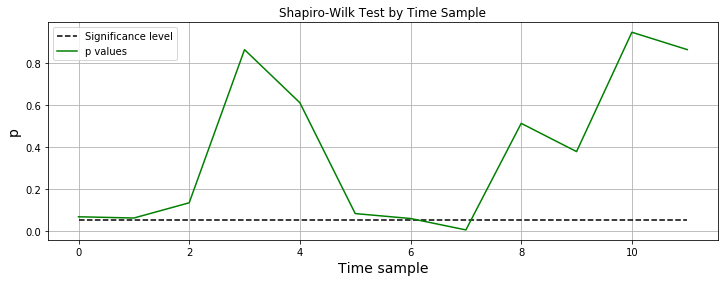

In [8]:
data = []
std = np.abs(np.random.normal(1, 100, 12))
for i in range(12):
    data.append(np.random.normal(0, std[i], 100))
x = np.linspace(0, len(data)-1, len(data))
plot_swtest(x, data, log_y=False)